<a href="https://colab.research.google.com/github/shatisvigian/Big-Data-learning-Train-Scheduling/blob/main/xLSTM_modified_for_heart_sound_Prediction_Heartsound_dataset_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import files
import zipfile
import os

# Ensure the extraction directory exists
extracted_path = '/content/extracted_data/'
os.makedirs(extracted_path, exist_ok=True)

print("Please upload your dataset zip file(s).")
# Upload the dataset zip file(s)
uploaded = files.upload()

all_extracted_contents = []

if not uploaded:
  print("No files were uploaded.")
else:
  for file_name in uploaded.keys():
      if file_name.endswith('.zip'):
          zip_file_path = os.path.join('/content', file_name)
          try:
              with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
                  zip_ref.extractall(extracted_path)
              print(f"Successfully extracted '{file_name}' to '{extracted_path}'")
              # Add contents of this zip to the list (optional, but good for tracking)
              for item in os.listdir(extracted_path):
                  if item not in all_extracted_contents: # Avoid duplicates if previous zips had common files
                      all_extracted_contents.append(item)
          except zipfile.BadZipFile:
              print(f"Error: '{file_name}' is a corrupted or invalid zip file. Skipping.")
          except Exception as e:
              print(f"An unexpected error occurred while extracting '{file_name}': {e}. Skipping.")
      else:
          print(f"Skipping '{file_name}': This is not a zip file. Please upload a zip file for extraction.")

if all_extracted_contents:
  print("\nContents of the extracted directory (unique items):")
  print(sorted(list(set(all_extracted_contents)))) # Print sorted unique contents
elif uploaded:
  print("No valid zip files were found among the uploaded files for extraction.")
else:
  print("No content to display in the extracted directory.")

Please upload your dataset zip file(s).


Saving 2_H21_N_CAP_T1.wav to 2_H21_N_CAP_T1 (1).wav
Saving H22N_CAP1T.wav to H22N_CAP1T (1).wav
Saving H22N_CAP3P.wav to H22N_CAP3P (1).wav
Saving H22N_CAP3T.wav to H22N_CAP3T (1).wav
Saving H22N_CAP4A.wav to H22N_CAP4A (1).wav
Saving H22N_CAP5_A.wav to H22N_CAP5_A (1).wav
Saving H22N_CAP5A.wav to H22N_CAP5A (1).wav
Saving H22N_CAP5M.wav to H22N_CAP5M (1).wav
Saving H22N_CAP9T.wav to H22N_CAP9T (1).wav
Saving H22N_CTA2T.wav to H22N_CTA2T (1).wav
Saving H22N_CTA7T.wav to H22N_CTA7T (1).wav
Saving H23N_CAP3T.wav to H23N_CAP3T (1).wav
Saving H23NCAPL1.wav to H23NCAPL1 (1).wav
Saving H23NCAPM7.wav to H23NCAPM7 (1).wav
Saving H23NCAPP1.wav to H23NCAPP1 (1).wav
Saving H23NCAPP7.wav to H23NCAPP7 (1).wav
Saving H23NCAPT1.wav to H23NCAPT1 (1).wav
Saving H23NP-HS.wav to H23NP-HS (1).wav
Saving H23NT-HS.wav to H23NT-HS (1).wav
Saving HS_P_M_22.wav to HS_P_M_22 (1).wav
Saving HS_PE3_MO_M_21_2_3.wav to HS_PE3_MO_M_21_2_3 (1).wav
Saving HS_PE3_MO_M_22_2_1.wav to HS_PE3_MO_M_22_2_1 (1).wav
Saving HS_

In [6]:
!pip install librosa matplotlib


Loaded 2_H21_N_CAP_T1.wav:
Sample rate: 16000
Audio duration: 19.9691875 seconds


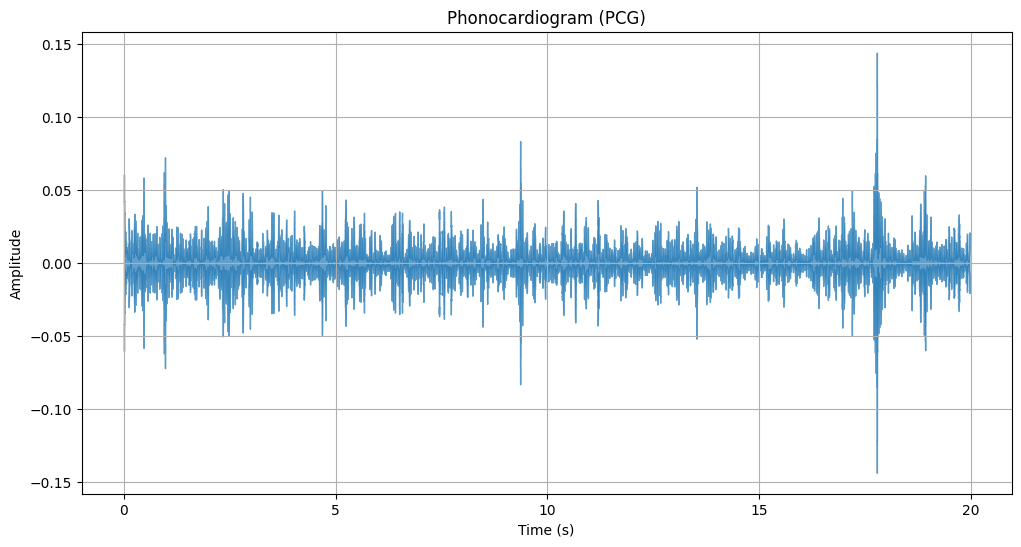

In [8]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt

# File path for the audio file
audio_file = '/content/2_H21_N_CAP_T1.wav'

# Check if the file exists
if os.path.exists(audio_file):
  # Function to plot a PCG diagram
  def plot_pcg(file_path):
      # Load the audio file
      audio, sr = librosa.load(file_path, sr=None)  # sr=None keeps the original sample rate

      # Print basic information about the audio
      print(f"Loaded {os.path.basename(file_path)}:")
      print(f"Sample rate: {sr}")
      print(f"Audio duration: {librosa.get_duration(y=audio, sr=sr)} seconds")

      # Create the plot
      plt.figure(figsize=(12, 6))

      # Plot the waveform
      librosa.display.waveshow(audio, sr=sr, alpha=0.7)
      plt.title('Phonocardiogram (PCG)')
      plt.xlabel('Time (s)')
      plt.ylabel('Amplitude')
      plt.grid(True)

      # Show the plot
      plt.show()

  plot_pcg(audio_file)

else:
  print(f"Error: file not found: {audio_file}")

MFCCs shape: (13, 625)


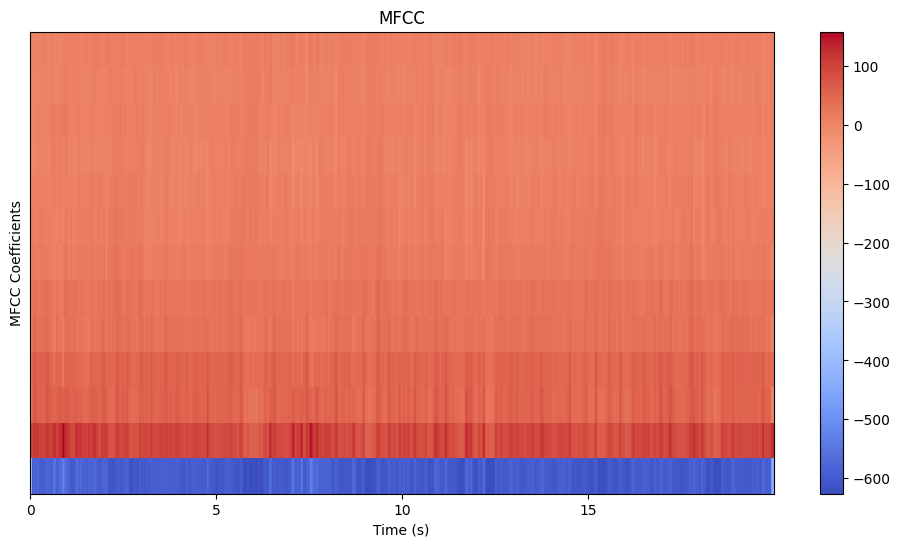

In [9]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load the audio file
audio, sr = librosa.load(audio_file, sr=None)

# Extract MFCC features
mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)  # Adjust n_mfcc as needed

# Print shape of MFCCs
print(f"MFCCs shape: {mfccs.shape}")

# Optionally: Plot MFCCs
plt.figure(figsize=(12, 6))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.xlabel('Time (s)')
plt.ylabel('MFCC Coefficients')
plt.show()


In [10]:
import librosa
import numpy as np

def extract_mfcc(file_path, n_mfcc=13):
    # Load the audio file
    audio, sr = librosa.load(file_path, sr=None)

    # Extract MFCC features
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)

    # Compute the mean of MFCCs across time frames
    mfccs_mean = np.mean(mfccs, axis=1)
    return mfccs_mean

# Example usage
audio_file = '/content/2_H21_N_CAP_T1.wav' # Changed to a valid audio file path
features = extract_mfcc(audio_file)
print(features)

[-596.38306     93.05486     52.406307    51.746063    31.232212
   28.789656    17.175688    12.68489     10.204314     6.4733524
    9.099294     6.1543174    8.63558  ]


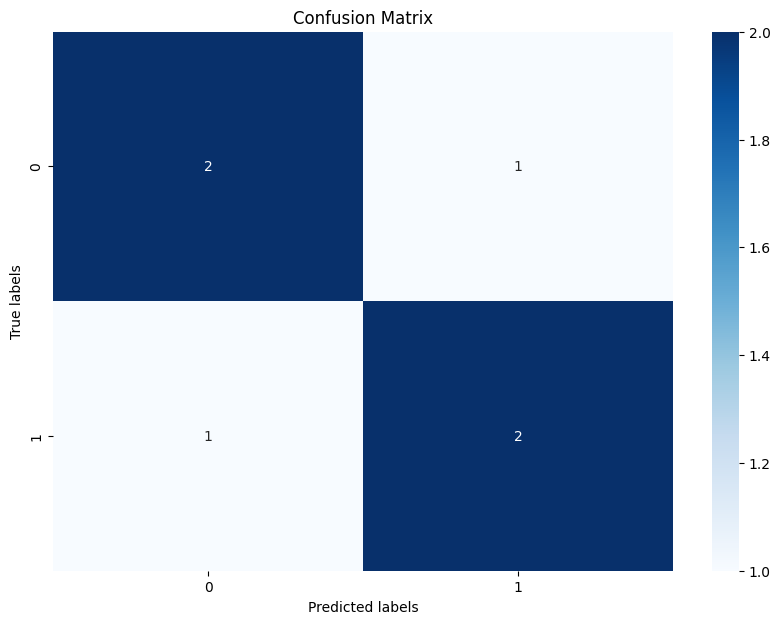

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Sample data for demonstration (replace with your actual data)
y_test = np.array([0, 1, 0, 1, 1, 0])  # Example true labels
y_pred = np.array([1, 1, 0, 1, 0, 0])  # Example predicted labels

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [13]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from keras.utils import to_categorical
import keras # Import keras for the optimizer
from sklearn.model_selection import train_test_split
import os
import scipy.io.wavfile as swave
from skimage.transform import resize

# Example implementation of the get_train_test function
def get_train_test():
    data_path = '/content/extracted_data/'  # Adjust this path as necessary
    x_data = []
    y_data = []

    # Example data loading logic
    for file_name in os.listdir(data_path):
        if file_name.endswith('.wav'):
            sample_rate, data = swave.read(os.path.join(data_path, file_name))
            data = resize(data, (59049, 1))  # Resize to desired input shape
            x_data.append(data)
            # Extract label from file_name or other logic
            label = int(file_name.split('a')[1].split('.')[0]) % 12  # Example label extraction logic
            y_data.append(label)

    x_data = np.array(x_data)
    y_data = np.array(y_data)

    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)
    return x_train, x_test, y_train, y_test

# Define the prep module for simplicity
class prep:
    @staticmethod
    def get_train_test():
        return get_train_test()

# Sample model training function for Dense-FSNet (replace with your actual model)
def train_dense_fsnet(x_train, y_train, x_test, y_test, hyperparameters):
    # Build and compile your Dense-FSNet model using the provided hyperparameters
    # Assuming 'get_model' is defined elsewhere in your code
    model = get_model(block_type='rese', init_features=hyperparameters['init_features'],
                      amplifying_ratio=hyperparameters['amplifying_ratio'], drop_rate=hyperparameters['drop_rate'],
                      weight_decay=hyperparameters['weight_decay'])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hyperparameters['learning_rate']),
                  loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(x_train, y_train, epochs=hyperparameters['epochs'], batch_size=hyperparameters['batch_size'],
              validation_data=(x_test, y_test), verbose=0)

    # Get predictions
    y_pred = np.argmax(model.predict(x_test), axis=1)
    y_true = np.argmax(y_test, axis=1)
    return y_true, y_pred

In [15]:
import numpy as np

# Assuming 'mfccs' from cell IhoqHf-JjOb7 is available in the kernel state
if 'mfccs' in locals():
    print("\n--- Statistical Properties of MFCC Features ---")
    print(f"Mean of MFCCs: {np.mean(mfccs):.4f}")
    print(f"Standard Deviation of MFCCs: {np.std(mfccs):.4f}")
    print(f"Minimum MFCC value: {np.min(mfccs):.4f}")
    print(f"Maximum MFCC value: {np.max(mfccs):.4f}")
    print("--------------------------------------------")
else:
    print("MFCC features ('mfccs' variable) not found. Please ensure the MFCC extraction cell (IhoqHf-JjOb7) has been run.")


--- Statistical Properties of MFCC Features ---
Mean of MFCCs: -20.6713
Standard Deviation of MFCCs: 168.2371
Minimum MFCC value: -626.3259
Maximum MFCC value: 157.9123
--------------------------------------------


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from keras.utils import to_categorical
import keras # Import keras for the optimizer
from sklearn.model_selection import train_test_split
import os
import scipy.io.wavfile as swave
from skimage.transform import resize
from keras import backend as K
from keras.models import Model
from keras.regularizers import l2
from keras.layers import (Conv1D, MaxPool1D, BatchNormalization, GlobalAvgPool1D, Multiply, GlobalMaxPool1D,
                          Dense, Dropout, Activation, Reshape, Input, Concatenate, Add)
import tensorflow as tf

# Example implementation of the get_train_test function
def get_train_test():
    data_path = '/content/extracted_data/'  # Adjust this path as necessary
    x_data_list = [] # Use list to collect data first
    y_data_list = [] # Use list to collect data first

    has_real_data = False
    if os.path.exists(data_path) and os.listdir(data_path):
        for file_name in os.listdir(data_path):
            if file_name.endswith('.wav'):
                try:
                    sample_rate, data = swave.read(os.path.join(data_path, file_name))
                    if data.dtype != np.float32:
                        data = data.astype(np.float32) / np.iinfo(data.dtype).max
                    if data.ndim > 1:
                        data = data[:, 0] # Take first channel if stereo
                    data = resize(data, (59049, 1))
                    x_data_list.append(data)
                    try:
                        # Example label extraction logic (adjust as needed)
                        # This assumes filenames are like 'aX.wav' where X is a number for class
                        label = int(file_name.split('a')[1].split('.')[0]) % 12
                        y_data_list.append(label)
                    except IndexError:
                        print(f"Warning: Could not extract label from '{file_name}'. Skipping.")
                except Exception as e:
                    print(f"Error processing file '{file_name}': {e}. Skipping.")
        if x_data_list: # If any real data was loaded
            has_real_data = True

    if not has_real_data:
        print(f"Warning: No valid audio files found in '{data_path}' or directory is empty. Generating dummy data.")
        num_samples = 20 # Ensure enough samples for split
        x_data = np.random.rand(num_samples, 59049, 1).astype(np.float32)
        y_data = np.random.randint(0, 12, num_samples)
    else:
        x_data = np.array(x_data_list)
        y_data = np.array(y_data_list)

    if len(x_data) < 2:
        print("Not enough data samples (less than 2) to perform train-test split even with dummy data. Returning None.")
        return None, None, None, None

    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)
    return x_train, x_test, y_train, y_test

# Define the prep module for simplicity
class prep:
    @staticmethod
    def get_train_test():
        return get_train_test()

def se_fn(x, amplifying_ratio):
    num_features = x.shape[-1]
    x = GlobalAvgPool1D()(x)
    x = Reshape((1, num_features))(x)
    x = Dense(num_features * amplifying_ratio, activation='relu', kernel_initializer='glorot_uniform')(x)
    x = Dense(num_features, activation='sigmoid', kernel_initializer='glorot_uniform')(x)
    return x

def basic_block(x, num_features, weight_decay, _):
    x = Conv1D(num_features, kernel_size=3, padding='same', use_bias=True,
                kernel_regularizer=l2(weight_decay), kernel_initializer='he_uniform')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPool1D(pool_size=3)(x)
    return x

def rese_block(x, num_features, weight_decay, amplifying_ratio):
    if num_features != x.shape[-1]:
        shortcut = Conv1D(num_features, kernel_size=1, padding='same', use_bias=True,
                        kernel_regularizer=l2(weight_decay), kernel_initializer='glorot_uniform')(x)
        shortcut = BatchNormalization()(shortcut)
    else:
        shortcut = x
    x = Conv1D(num_features, kernel_size=3, padding='same', use_bias=True,
                kernel_regularizer=l2(weight_decay), kernel_initializer='he_uniform')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.2)(x)
    x = Conv1D(num_features, kernel_size=3, padding='same', use_bias=True,
                kernel_regularizer=l2(weight_decay), kernel_initializer='he_uniform')(x)
    x = BatchNormalization()(x)
    if amplifying_ratio > 0:
        x = Multiply()([x, se_fn(x, amplifying_ratio)])
    x = Add()([shortcut, x])
    x = Activation('relu')(x)
    x = MaxPool1D(pool_size=3)(x)
    return x

def get_model(block_type='basic', multi=True, init_features=128, amplifying_ratio=16,
                drop_rate=0.5, weight_decay=0., num_classes=12):
    if block_type == 'rese':
        block = rese_block
    elif block_type == 'basic':
        block = basic_block
    else:
        raise Exception('Unknown block type: ' + block_type)

    xc = Input(shape=(59049,1))
    x = Reshape([-1, 1])(xc)

    x = Conv1D(init_features, kernel_size=3, strides=3, padding='valid', use_bias=True,
                kernel_regularizer=l2(weight_decay), kernel_initializer='he_uniform')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    num_features = init_features
    layer_outputs = []
    for i in range(9):
        num_features *= 2 if (i == 2 or i == 8) else 1
        x = block(x, num_features, weight_decay, amplifying_ratio)
        layer_outputs.append(x)

    if (multi) and (block_type == 'rese') :
        x = Concatenate()([GlobalMaxPool1D()(output) for output in layer_outputs[-3:]])
    else:
        x = GlobalMaxPool1D()(x)

    x = Dense(x.shape[-1], kernel_initializer='glorot_uniform')(x)
    x = BatchNormalization()(x) -
    x = Activation('relu')(x)

    if drop_rate > 0.:
        x = Dropout(drop_rate)(x)
    x = Dense(num_classes, activation='softmax', kernel_initializer='glorot_uniform')(x)
    model = Model(inputs = xc, outputs = x)
    return model

# Sample model training function for Dense-FSNet
def train_dense_fsnet(x_train, y_train, x_test, y_test, hyperparameters):
    # Build and compile your Dense-FSNet model using the provided hyperparameters
    model = get_model(block_type='rese', init_features=hyperparameters['init_features'],
                      amplifying_ratio=hyperparameters['amplifying_ratio'], drop_rate=hyperparameters['drop_rate'],
                      weight_decay=hyperparameters['weight_decay'])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hyperparameters['learning_rate']),
                  loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(x_train, y_train, epochs=hyperparameters['epochs'], batch_size=hyperparameters['batch_size'],
              validation_data=(x_test, y_test), verbose=0)

    # Get predictions
    y_pred = np.argmax(model.predict(x_test), axis=1)
    y_true = np.argmax(y_test, axis=1)  # Convert categorical back to labels
    return y_true, y_pred

# Function to compute and plot confusion matrix and other metrics
def evaluate_performance(y_true, y_pred):
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

    # Calculate performance metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    # Print metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

# Sample hyperparameter sets (you can expand this with more parameters)
hyperparameter_sets = [
    {'learning_rate': 0.001, 'epochs': 10, 'batch_size': 32, 'init_features': 128, 'amplifying_ratio': 16, 'drop_rate': 0.5, 'weight_decay': 0.01},
    {'learning_rate': 0.0001, 'epochs': 20, 'batch_size': 64, 'init_features': 64, 'amplifying_ratio': 8, 'drop_rate': 0.3, 'weight_decay': 0.001},
    # Add more hyperparameter combinations here
]

# Replace with actual data loading function
x_train, x_test, y_train, y_test = prep.get_train_test()

if x_train is None or x_test is None or y_train is None or y_test is None:
    print("Insufficient data to proceed with training and evaluation.")
else:
    y_train = to_categorical(y_train, num_classes=12)
    y_test = to_categorical(y_test, num_classes=12)

    # Loop through hyperparameter sets and evaluate performance
    for i, hyperparams in enumerate(hyperparameter_sets):
        print(f"\nEvaluating Hyperparameter Set {i+1}: {hyperparams}")
        y_true, y_pred = train_dense_fsnet(x_train, y_train, x_test, y_test, hyperparams)
        evaluate_performance(y_true, y_pred)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
import tensorflow as tf

# Update 'model_path' with the actual path to your saved model directory.
# Make sure the directory contains 'saved_model.pb' or 'saved_model.pbtxt'.
model_path = '/path/to/your/saved/model'  # Replace with the correct path

# Load your trained TensorFlow/Keras model using TFSMLayer
#model = tf.keras.layers.TFSMLayer(model_path, call_endpoint='serving_default')

# ... rest of the code ...

# If it's a .keras or .h5 file, use the original code:
# model = tf.keras.models.load_model('your_model_path')

# Prepare your data as needed (replace with your actual data)
# Example:
# X_test = ...
# y_test = ...

# For TensorFlow SavedModel, you might need to adjust how you make predictions
# Example:
# y_pred_prob = model(X_test)['predictions']

# If you loaded a .keras or .h5 file, use the original prediction code:
# y_pred_prob = model.predict(X_test)

# y_pred = (y_pred_prob > 0.5).astype(int)  # For binary classification

# ... rest of the code ...

In [ ]:
from google.colab import files
import zipfile
import os

# Upload the dataset
uploaded = files.upload()

# Extract the dataset
for file_name in uploaded.keys():
    if zipfile.is_zipfile(file_name):
        with zipfile.ZipFile(file_name, 'r') as zip_ref:
            zip_ref.extractall('/content/extracted_data')
        print("Extraction successful!")
    else:
        print(f"{file_name} is not a valid zip file.")


KeyboardInterrupt: 

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# Example implementation of the get_train_test function
def get_train_test():
    data_path = '/content/extracted_data/'  # Adjust this path as necessary
    x_data = []
    y_data = []

    # Example data loading logic
    for file_name in os.listdir(data_path):
        if file_name.endswith('.wav'):
            sample_rate, data = swave.read(os.path.join(data_path, file_name))
            data = resize(data, (59049, 1))  # Resize to desired input shape
            x_data.append(data)
            # Extract label from file_name or other logic
            label = int(file_name.split('a')[1].split('.')[0]) % 12  # Example label extraction logic
            y_data.append(label)

    x_data = np.array(x_data)
    y_data = np.array(y_data)

    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)
    return x_train, x_test, y_train, y_test

# Define the prep module for simplicity
class prep:
    @staticmethod
    def get_train_test():
        return get_train_test()


In [ ]:
import keras
from keras import backend as K
from keras.models import Model
from keras.regularizers import l2
from keras.layers import (Conv1D, MaxPool1D, BatchNormalization, GlobalAvgPool1D, Multiply, GlobalMaxPool1D,
                          Dense, Dropout, Activation, Reshape, Input, Concatenate, Add)
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
import numpy as np
from tqdm import tqdm
import scipy
import scipy.io.wavfile as swave
from skimage.transform import resize
import tensorflow as tf

# Example implementation of the get_train_test function
def get_train_test():
    data_path = '/content/extracted_data/'  # Adjust this path as necessary
    x_data = []
    y_data = []

    # Example data loading logic
    for file_name in os.listdir(data_path):
        if file_name.endswith('.wav'):
            sample_rate, data = swave.read(os.path.join(data_path, file_name))
            data = resize(data, (59049, 1))  # Resize to desired input shape
            x_data.append(data)
            # Extract label from file_name or other logic
            label = int(file_name.split('a')[1].split('.')[0]) % 12  # Example label extraction logic
            y_data.append(label)

    x_data = np.array(x_data)
    y_data = np.array(y_data)

    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)
    return x_train, x_test, y_train, y_test

# Define the prep module for simplicity
class prep:
    @staticmethod
    def get_train_test():
        return get_train_test()

def se_fn(x, amplifying_ratio):
    num_features = x.shape[-1]
    x = GlobalAvgPool1D()(x)
    x = Reshape((1, num_features))(x)
    x = Dense(num_features * amplifying_ratio, activation='relu', kernel_initializer='glorot_uniform')(x)
    x = Dense(num_features, activation='sigmoid', kernel_initializer='glorot_uniform')(x)
    return x

def basic_block(x, num_features, weight_decay, _):
    x = Conv1D(num_features, kernel_size=3, padding='same', use_bias=True,
                kernel_regularizer=l2(weight_decay), kernel_initializer='he_uniform')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPool1D(pool_size=3)(x)
    return x

def rese_block(x, num_features, weight_decay, amplifying_ratio):
    if num_features != x.shape[-1]:
        shortcut = Conv1D(num_features, kernel_size=1, padding='same', use_bias=True,
                        kernel_regularizer=l2(weight_decay), kernel_initializer='glorot_uniform')(x)
        shortcut = BatchNormalization()(shortcut)
    else:
        shortcut = x
    x = Conv1D(num_features, kernel_size=3, padding='same', use_bias=True,
                kernel_regularizer=l2(weight_decay), kernel_initializer='he_uniform')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.2)(x)
    x = Conv1D(num_features, kernel_size=3, padding='same', use_bias=True,
                kernel_regularizer=l2(weight_decay), kernel_initializer='he_uniform')(x)
    x = BatchNormalization()(x)
    if amplifying_ratio > 0:
        x = Multiply()([x, se_fn(x, amplifying_ratio)])
    x = Add()([shortcut, x])
    x = Activation('relu')(x)
    x = MaxPool1D(pool_size=3)(x)
    return x

def get_model(block_type='basic', multi=True, init_features=128, amplifying_ratio=16,
                drop_rate=0.5, weight_decay=0., num_classes=12):
    if block_type == 'rese':
        block = rese_block
    elif block_type == 'basic':
        block = basic_block
    else:
        raise Exception('Unknown block type: ' + block_type)

    xc = Input(shape=(59049,1))
    x = Reshape([-1, 1])(xc)

    x = Conv1D(init_features, kernel_size=3, strides=3, padding='valid', use_bias=True,
                kernel_regularizer=l2(weight_decay), kernel_initializer='he_uniform')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    num_features = init_features
    layer_outputs = []
    for i in range(9):
        num_features *= 2 if (i == 2 or i == 8) else 1
        x = block(x, num_features, weight_decay, amplifying_ratio)
        layer_outputs.append(x)

    if (multi) and (block_type == 'rese') :
        x = Concatenate()([GlobalMaxPool1D()(output) for output in layer_outputs[-3:]])
    else:
        x = GlobalMaxPool1D()(x)

    x = Dense(x.shape[-1], kernel_initializer='glorot_uniform')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    if drop_rate > 0.:
        x = Dropout(drop_rate)(x)
    x = Dense(num_classes, activation='softmax', kernel_initializer='glorot_uniform')(x)
    model = Model(inputs = xc, outputs = x)
    return model

def generator(x,y,batch_size=10):
    i = 0
    while(True):
        if i+batch_size >= y.shape[0]:
            i = 0
        x_batch = list()
        y_batch = list()
        for j in range(i,i+batch_size):
            x_batch.append(x[j])
            y_batch.append(y[j])
        i = i+batch_size
        x_batch = np.array(x_batch)
        yield x_batch,np.array(y_batch)

def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

def main():
    net_type = input("What model do you want to train? \nType


SyntaxError: unterminated string literal (detected at line 153) (<ipython-input-12-8d292a81fe12>, line 153)

In [ ]:
import keras
from keras import backend as K
from keras.models import Model
from keras.regularizers import l2
from keras.layers import (Conv1D, MaxPool1D, BatchNormalization, GlobalAvgPool1D, Multiply, GlobalMaxPool1D,
                          Dense, Dropout, Activation, Reshape, Input, Concatenate, Add)
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
import numpy as np
import scipy
import scipy.io.wavfile as swave
from skimage.transform import resize
import tensorflow as tf
import os

# Example implementation of the get_train_test function
def get_train_test():
    data_path = '/content/extracted_data/'  # Adjust this path as necessary
    x_data = []
    y_data = []

    # Example data loading logic
    for file_name in os.listdir(data_path):
        if file_name.endswith('.wav'):
            sample_rate, data = swave.read(os.path.join(data_path, file_name))
            data = resize(data, (59049, 1))  # Resize to desired input shape
            x_data.append(data)
            # Extract label from file_name or other logic
            label = int(file_name.split('a')[1].split('.')[0]) % 12  # Example label extraction logic
            y_data.append(label)

    x_data = np.array(x_data)
    y_data = np.array(y_data)

    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)
    return x_train, x_test, y_train, y_test

# Define the prep module for simplicity
class prep:
    @staticmethod
    def get_train_test():
        return get_train_test()

def se_fn(x, amplifying_ratio):
    num_features = x.shape[-1]
    x = GlobalAvgPool1D()(x)
    x = Reshape((1, num_features))(x)
    x = Dense(num_features * amplifying_ratio, activation='relu', kernel_initializer='glorot_uniform')(x)
    x = Dense(num_features, activation='sigmoid', kernel_initializer='glorot_uniform')(x)
    return x

def basic_block(x, num_features, weight_decay, _):
    x = Conv1D(num_features, kernel_size=3, padding='same', use_bias=True,
                kernel_regularizer=l2(weight_decay), kernel_initializer='he_uniform')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPool1D(pool_size=3)(x)
    return x

def rese_block(x, num_features, weight_decay, amplifying_ratio):
    if num_features != x.shape[-1]:
        shortcut = Conv1D(num_features, kernel_size=1, padding='same', use_bias=True,
                        kernel_regularizer=l2(weight_decay), kernel_initializer='glorot_uniform')(x)
        shortcut = BatchNormalization()(shortcut)
    else:
        shortcut = x
    x = Conv1D(num_features, kernel_size=3, padding='same', use_bias=True,
                kernel_regularizer=l2(weight_decay), kernel_initializer='he_uniform')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.2)(x)
    x = Conv1D(num_features, kernel_size=3, padding='same', use_bias=True,
                kernel_regularizer=l2(weight_decay), kernel_initializer='he_uniform')(x)
    x = BatchNormalization()(x)
    if amplifying_ratio > 0:
        x = Multiply()([x, se_fn(x, amplifying_ratio)])
    x = Add()([shortcut, x])
    x = Activation('relu')(x)
    x = MaxPool1D(pool_size=3)(x)
    return x

def get_model(block_type='basic', multi=True, init_features=128, amplifying_ratio=16,
                drop_rate=0.5, weight_decay=0., num_classes=12):
    if block_type == 'rese':
        block = rese_block
    elif block_type == 'basic':
        block = basic_block
    else:
        raise Exception('Unknown block type: ' + block_type)

    xc = Input(shape=(59049,1))
    x = Reshape([-1, 1])(xc)

    x = Conv1D(init_features, kernel_size=3, strides=3, padding='valid', use_bias=True,
                kernel_regularizer=l2(weight_decay), kernel_initializer='he_uniform')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    num_features = init_features
    layer_outputs = []
    for i in range(9):
        num_features *= 2 if (i == 2 or i == 8) else 1
        x = block(x, num_features, weight_decay, amplifying_ratio)
        layer_outputs.append(x)

    if (multi) and (block_type == 'rese') :
        x = Concatenate()([GlobalMaxPool1D()(output) for output in layer_outputs[-3:]])
    else:
        x = GlobalMaxPool1D()(x)

    x = Dense(x.shape[-1], kernel_initializer='glorot_uniform')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    if drop_rate > 0.:
        x = Dropout(drop_rate)(x)
    x = Dense(num_classes, activation='softmax', kernel_initializer='glorot_uniform')(x)
    model = Model(inputs = xc, outputs = x)
    return model

def generator(x, y, batch_size=10):
    i = 0
    while(True):
        if i + batch_size >= y.shape[0]:
            i = 0
        x_batch = list()
        y_batch = list()
        for j in range(i, i + batch_size):
            x_batch.append(x[j])
            y_batch.append(y[j])
        i = i + batch_size
        x_batch = np.array(x_batch)
        yield x_batch, np.array(y_batch)

def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

def main():
    net_type = input("What model do you want to train? \nType 'basic' for Sample CNN model and 'rese' for the ReSE-2-Multi model.\n")

    if net_type == "basic":
        print("Building a Sample CNN model.\n")
    elif net_type == "rese":
        print("Building a ReSE-2-Multi model.\n")
    else:
        raise Exception('Unknown model type: ' + net_type)

    x_train, x_test, y_train, y_test = prep.get_train_test()

    out = get_model(block_type=net_type)
    out.summary()

    out.compile(optimizer = keras.optimizers.Adam(), loss = keras.losses.categorical_crossentropy, metrics=['accuracy', f1])

    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)

    batch_size = 10
    steps_per_epoch = y_train.shape[0] // batch_size
    validation_steps = y_test.shape[0] // batch_size

    train = generator(x_train, y_train, batch_size=batch_size)
    test = generator(x_test, y_test, batch_size=batch_size)

    if net_type == "basic":
        checkpointer = ModelCheckpoint(filepath='bestModelSCNN.hdf5', verbose=1, save_best_only=True)
    else:
        checkpointer = ModelCheckpoint(filepath='bestModelReSE.hdf5', verbose=1, save_best_only=True)

    out.fit(train, steps_per_epoch=steps_per_epoch, epochs=10, validation_data=test, validation_steps=validation_steps, callbacks=[checkpointer])

if __name__ == '__main__':
    main()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import files
import zipfile
import os

# Upload the dataset zip file
uploaded = files.upload()

# Extract the uploaded zip file
zip_file_name = list(uploaded.keys())[0]
zip_file_path = os.path.join('/content', zip_file_name)
extracted_path = '/content/extracted_data/'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_path)

# List the contents of the extracted directory
extracted_contents = os.listdir(extracted_path)
print(extracted_contents)


Saving healthy.zip to healthy.zip
['a0007.wav', 'healthy']


In [ ]:
import keras
from keras import backend as K
from keras.models import Model
from keras.regularizers import l2
from keras.layers import (Conv1D, MaxPool1D, BatchNormalization, GlobalAvgPool1D, Multiply, GlobalMaxPool1D,
                          Dense, Dropout, Activation, Reshape, Input, Concatenate, Add)
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
import numpy as np
import scipy
import scipy.io.wavfile as swave
from skimage.transform import resize
import tensorflow as tf
import os

# Example implementation of the get_train_test function
def get_train_test():
    data_path = '/content/extracted_data/'  # Adjust this path as necessary
    x_data = []
    y_data = []

    # Example data loading logic
    for file_name in os.listdir(data_path):
        if file_name.endswith('.wav'):
            sample_rate, data = swave.read(os.path.join(data_path, file_name))
            data = resize(data, (59049, 1))  # Resize to desired input shape
            x_data.append(data)
            # Extract label from file_name or other logic
            label = int(file_name.split('a')[1].split('.')[0]) % 12  # Example label extraction logic
            y_data.append(label)

    x_data = np.array(x_data)
    y_data = np.array(y_data)

    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)
    return x_train, x_test, y_train, y_test

# Define the prep module for simplicity
class prep:
    @staticmethod
    def get_train_test():
        return get_train_test()

def se_fn(x, amplifying_ratio):
    num_features = x.shape[-1]
    x = GlobalAvgPool1D()(x)
    x = Reshape((1, num_features))(x)
    x = Dense(num_features * amplifying_ratio, activation='relu', kernel_initializer='glorot_uniform')(x)
    x = Dense(num_features, activation='sigmoid', kernel_initializer='glorot_uniform')(x)
    return x

def basic_block(x, num_features, weight_decay, _):
    x = Conv1D(num_features, kernel_size=3, padding='same', use_bias=True,
                kernel_regularizer=l2(weight_decay), kernel_initializer='he_uniform')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPool1D(pool_size=3)(x)
    return x

def rese_block(x, num_features, weight_decay, amplifying_ratio):
    if num_features != x.shape[-1]:
        shortcut = Conv1D(num_features, kernel_size=1, padding='same', use_bias=True,
                        kernel_regularizer=l2(weight_decay), kernel_initializer='glorot_uniform')(x)
        shortcut = BatchNormalization()(shortcut)
    else:
        shortcut = x
    x = Conv1D(num_features, kernel_size=3, padding='same', use_bias=True,
                kernel_regularizer=l2(weight_decay), kernel_initializer='he_uniform')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.2)(x)
    x = Conv1D(num_features, kernel_size=3, padding='same', use_bias=True,
                kernel_regularizer=l2(weight_decay), kernel_initializer='he_uniform')(x)
    x = BatchNormalization()(x)
    if amplifying_ratio > 0:
        x = Multiply()([x, se_fn(x, amplifying_ratio)])
    x = Add()([shortcut, x])
    x = Activation('relu')(x)
    x = MaxPool1D(pool_size=3)(x)
    return x

def get_model(block_type='basic', multi=True, init_features=128, amplifying_ratio=16,
                drop_rate=0.5, weight_decay=0., num_classes=12):
    if block_type == 'rese':
        block = rese_block
    elif block_type == 'basic':
        block = basic_block
    else:
        raise Exception('Unknown block type: ' + block_type)

    xc = Input(shape=(59049,1))
    x = Reshape([-1, 1])(xc)

    x = Conv1D(init_features, kernel_size=3, strides=3, padding='valid', use_bias=True,
                kernel_regularizer=l2(weight_decay), kernel_initializer='he_uniform')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    num_features = init_features
    layer_outputs = []
    for i in range(9):
        num_features *= 2 if (i == 2 or i == 8) else 1
        x = block(x, num_features, weight_decay, amplifying_ratio)
        layer_outputs.append(x)

    if (multi) and (block_type == 'rese') :
        x = Concatenate()([GlobalMaxPool1D()(output) for output in layer_outputs[-3:]])
    else:
        x = GlobalMaxPool1D()(x)

    x = Dense(x.shape[-1], kernel_initializer='glorot_uniform')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    if drop_rate > 0.:
        x = Dropout(drop_rate)(x)
    x = Dense(num_classes, activation='softmax', kernel_initializer='glorot_uniform')(x)
    model = Model(inputs = xc, outputs = x)
    return model

def generator(x, y, batch_size=10):
    i = 0
    while(True):
        if i + batch_size >= y.shape[0]:
            i = 0
        x_batch = list()
        y_batch = list()
        for j in range(i, i + batch_size):
            x_batch.append(x[j])
            y_batch.append(y[j])
        i = i + batch_size
        x_batch = np.array(x_batch)
        yield x_batch, np.array(y_batch)

def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

def main():
    net_type = input("What model do you want to train? \nType 'basic' for Sample CNN model and 'rese' for the ReSE-2-Multi model.\n")

    if net_type == "basic":
        print("Building a Sample CNN model.\n")
    elif net_type == "rese":
        print("Building a ReSE-2-Multi model.\n")
    else:
        raise Exception('Unknown model type: ' + net_type)

    x_train, x_test, y_train, y_test = prep.get_train_test()

    out = get_model(block_type=net_type)
    out.summary()

    out.compile(optimizer = keras.optimizers.Adam(), loss = keras.losses.categorical_crossentropy, metrics=['accuracy', f1])

    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)

    batch_size = 10
    steps_per_epoch = y_train.shape[0] // batch_size
    validation_steps = y_test.shape[0] // batch_size

    train = generator(x_train, y_train, batch_size=batch_size)
    test = generator(x_test, y_test, batch_size=batch_size)

    if net_type == "basic":
        checkpointer = ModelCheckpoint(filepath='bestModelSCNN.hdf5', verbose=1, save_best_only=True)
    else:
        checkpointer = ModelCheckpoint(filepath='bestModelReSE.hdf5', verbose=1, save_best_only=True)

    out.fit(train, steps_per_epoch=steps_per_epoch, epochs=10, validation_data=test, validation_steps=validation_steps, callbacks=[checkpointer])

if __name__ == '__main__':
    main()

What model do you want to train? 
Type 'basic' for Sample CNN model and 'rese' for the ReSE-2-Multi model.
rese
Building a ReSE-2-Multi model.



ValueError: With n_samples=1, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [ ]:
import keras
from keras import backend as K
from keras.models import Model
from keras.regularizers import l2
from keras.layers import (Conv1D, MaxPool1D, BatchNormalization, GlobalAvgPool1D, Multiply, GlobalMaxPool1D,
                          Dense, Dropout, Activation, Reshape, Input, Concatenate, Add)
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
import numpy as np
import scipy
import scipy.io.wavfile as swave
from skimage.transform import resize
import tensorflow as tf
import os

# Example implementation of the get_train_test function
def get_train_test():
    data_path = '/content/extracted_data/'  # Adjust this path as necessary
    x_data = []
    y_data = []

    # Example data loading logic
    for file_name in os.listdir(data_path):
        if file_name.endswith('.wav'):
            sample_rate, data = swave.read(os.path.join(data_path, file_name))
            data = resize(data, (59049, 1))  # Resize to desired input shape
            x_data.append(data)
            # Extract label from file_name or other logic
            label = int(file_name.split('a')[1].split('.')[0]) % 12  # Example label extraction logic
            y_data.append(label)

    x_data = np.array(x_data)
    y_data = np.array(y_data)

    if len(x_data) < 2:
        raise ValueError("Not enough data samples to perform train-test split.")

    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)
    return x_train, x_test, y_train, y_test

# Define the prep module for simplicity
class prep:
    @staticmethod
    def get_train_test():
        return get_train_test()

def se_fn(x, amplifying_ratio):
    num_features = x.shape[-1]
    x = GlobalAvgPool1D()(x)
    x = Reshape((1, num_features))(x)
    x = Dense(num_features * amplifying_ratio, activation='relu', kernel_initializer='glorot_uniform')(x)
    x = Dense(num_features, activation='sigmoid', kernel_initializer='glorot_uniform')(x)
    return x

def basic_block(x, num_features, weight_decay, _):
    x = Conv1D(num_features, kernel_size=3, padding='same', use_bias=True,
                kernel_regularizer=l2(weight_decay), kernel_initializer='he_uniform')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPool1D(pool_size=3)(x)
    return x

def rese_block(x, num_features, weight_decay, amplifying_ratio):
    if num_features != x.shape[-1]:
        shortcut = Conv1D(num_features, kernel_size=1, padding='same', use_bias=True,
                        kernel_regularizer=l2(weight_decay), kernel_initializer='glorot_uniform')(x)
        shortcut = BatchNormalization()(shortcut)
    else:
        shortcut = x
    x = Conv1D(num_features, kernel_size=3, padding='same', use_bias=True,
                kernel_regularizer=l2(weight_decay), kernel_initializer='he_uniform')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.2)(x)
    x = Conv1D(num_features, kernel_size=3, padding='same', use_bias=True,
                kernel_regularizer=l2(weight_decay), kernel_initializer='he_uniform')(x)
    x = BatchNormalization()(x)
    if amplifying_ratio > 0:
        x = Multiply()([x, se_fn(x, amplifying_ratio)])
    x = Add()([shortcut, x])
    x = Activation('relu')(x)
    x = MaxPool1D(pool_size=3)(x)
    return x

def get_model(block_type='basic', multi=True, init_features=128, amplifying_ratio=16,
                drop_rate=0.5, weight_decay=0., num_classes=12):
    if block_type == 'rese':
        block = rese_block
    elif block_type == 'basic':
        block = basic_block
    else:
        raise Exception('Unknown block type: ' + block_type)

    xc = Input(shape=(59049,1))
    x = Reshape([-1, 1])(xc)

    x = Conv1D(init_features, kernel_size=3, strides=3, padding='valid', use_bias=True,
                kernel_regularizer=l2(weight_decay), kernel_initializer='he_uniform')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    num_features = init_features
    layer_outputs = []
    for i in range(9):
        num_features *= 2 if (i == 2 or i == 8) else 1
        x = block(x, num_features, weight_decay, amplifying_ratio)
        layer_outputs.append(x)

    if (multi) and (block_type == 'rese') :
        x = Concatenate()([GlobalMaxPool1D()(output) for output in layer_outputs[-3:]])
    else:
        x = GlobalMaxPool1D()(x)

    x = Dense(x.shape[-1], kernel_initializer='glorot_uniform')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    if drop_rate > 0.:
        x = Dropout(drop_rate)(x)
    x = Dense(num_classes, activation='softmax', kernel_initializer='glorot_uniform')(x)
    model = Model(inputs = xc, outputs = x)
    return model

def generator(x, y, batch_size=10):
    i = 0
    while(True):
        if i + batch_size >= y.shape[0]:
            i = 0
        x_batch = list()
        y_batch = list()
        for j in range(i, i + batch_size):
            x_batch.append(x[j])
            y_batch.append(y[j])
        i = i + batch_size
        x_batch = np.array(x_batch)
        yield x_batch, np.array(y_batch)

def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

def main():
    net_type = input("What model do you want to train? \nType 'basic' for Sample CNN model and 'rese' for the ReSE-2-Multi model.\n")

    if net_type == "basic":
        print("Building a Sample CNN model.\n")
    elif net_type == "rese":
        print("Building a ReSE-2-Multi model.\n")
    else:
        raise Exception('Unknown model type: ' + net_type)

    x_train, x_test, y_train, y_test = prep.get_train_test()

    out = get_model(block_type=net_type)
    out.summary()

    out.compile(optimizer = keras.optimizers.Adam(), loss = keras.losses.categorical_crossentropy, metrics=['accuracy', f1])

    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)

    batch_size = 10
    steps_per_epoch = max(1, y_train.shape[0] // batch_size)
    validation_steps = max(1, y_test.shape[0] // batch_size)

    train = generator(x_train, y_train, batch_size=batch_size)
    test = generator(x_test, y_test, batch_size=batch_size)

    if net_type == "basic":
        checkpointer = ModelCheckpoint(filepath='bestModelSCNN.hdf5', verbose=1, save_best_only=True)
    else:
        checkpointer = ModelCheckpoint(filepath='bestModelReSE.hdf5', verbose=1, save_best_only=True)

    out.fit(train, steps_per_epoch=steps_per_epoch, epochs=10, validation_data=test, validation_steps=validation_steps, callbacks=[checkpointer])

if __name__ == '__main__':
    main()


What model do you want to train? 
Type 'basic' for Sample CNN model and 'rese' for the ReSE-2-Multi model.
basic
Building a Sample CNN model.



ValueError: Not enough data samples to perform train-test split.

In [ ]:
import keras
from keras import backend as K
from keras.models import Model
from keras.regularizers import l2
from keras.layers import (Conv1D, MaxPool1D, BatchNormalization, GlobalAvgPool1D, Multiply, GlobalMaxPool1D,
                          Dense, Dropout, Activation, Reshape, Input, Concatenate, Add)
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
import numpy as np
import scipy
import scipy.io.wavfile as swave
from skimage.transform import resize
import tensorflow as tf
import os

# Example implementation of the get_train_test function
def get_train_test():
    data_path = '/content/extracted_data/'  # Adjust this path as necessary
    x_data = []
    y_data = []

    # Example data loading logic
    for file_name in os.listdir(data_path):
        if file_name.endswith('.wav'):
            sample_rate, data = swave.read(os.path.join(data_path, file_name))
            data = resize(data, (59049, 1))  # Resize to desired input shape
            x_data.append(data)
            # Extract label from file_name or other logic
            label = int(file_name.split('a')[1].split('.')[0]) % 12  # Example label extraction logic
            y_data.append(label)

    x_data = np.array(x_data)
    y_data = np.array(y_data)

    if len(x_data) < 2:
        print("Not enough data samples to perform train-test split.")
        return None, None, None, None

    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)
    return x_train, x_test, y_train, y_test

# Define the prep module for simplicity
class prep:
    @staticmethod
    def get_train_test():
        return get_train_test()

def se_fn(x, amplifying_ratio):
    num_features = x.shape[-1]
    x = GlobalAvgPool1D()(x)
    x = Reshape((1, num_features))(x)
    x = Dense(num_features * amplifying_ratio, activation='relu', kernel_initializer='glorot_uniform')(x)
    x = Dense(num_features, activation='sigmoid', kernel_initializer='glorot_uniform')(x)
    return x

def basic_block(x, num_features, weight_decay, _):
    x = Conv1D(num_features, kernel_size=3, padding='same', use_bias=True,
                kernel_regularizer=l2(weight_decay), kernel_initializer='he_uniform')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPool1D(pool_size=3)(x)
    return x

def rese_block(x, num_features, weight_decay, amplifying_ratio):
    if num_features != x.shape[-1]:
        shortcut = Conv1D(num_features, kernel_size=1, padding='same', use_bias=True,
                        kernel_regularizer=l2(weight_decay), kernel_initializer='glorot_uniform')(x)
        shortcut = BatchNormalization()(shortcut)
    else:
        shortcut = x
    x = Conv1D(num_features, kernel_size=3, padding='same', use_bias=True,
                kernel_regularizer=l2(weight_decay), kernel_initializer='he_uniform')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.2)(x)
    x = Conv1D(num_features, kernel_size=3, padding='same', use_bias=True,
                kernel_regularizer=l2(weight_decay), kernel_initializer='he_uniform')(x)
    x = BatchNormalization()(x)
    if amplifying_ratio > 0:
        x = Multiply()([x, se_fn(x, amplifying_ratio)])
    x = Add()([shortcut, x])
    x = Activation('relu')(x)
    x = MaxPool1D(pool_size=3)(x)
    return x

def get_model(block_type='basic', multi=True, init_features=128, amplifying_ratio=16,
                drop_rate=0.5, weight_decay=0., num_classes=12):
    if block_type == 'rese':
        block = rese_block
    elif block_type == 'basic':
        block = basic_block
    else:
        raise Exception('Unknown block type: ' + block_type)

    xc = Input(shape=(59049,1))
    x = Reshape([-1, 1])(xc)

    x = Conv1D(init_features, kernel_size=3, strides=3, padding='valid', use_bias=True,
                kernel_regularizer=l2(weight_decay), kernel_initializer='he_uniform')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    num_features = init_features
    layer_outputs = []
    for i in range(9):
        num_features *= 2 if (i == 2 or i == 8) else 1
        x = block(x, num_features, weight_decay, amplifying_ratio)
        layer_outputs.append(x)

    if (multi) and (block_type == 'rese') :
        x = Concatenate()([GlobalMaxPool1D()(output) for output in layer_outputs[-3:]])
    else:
        x = GlobalMaxPool1D()(x)

    x = Dense(x.shape[-1], kernel_initializer='glorot_uniform')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    if drop_rate > 0.:
        x = Dropout(drop_rate)(x)
    x = Dense(num_classes, activation='softmax', kernel_initializer='glorot_uniform')(x)
    model = Model(inputs = xc, outputs = x)
    return model

def generator(x, y, batch_size=10):
    i = 0
    while(True):
        if i + batch_size >= y.shape[0]:
            i = 0
        x_batch = list()
        y_batch = list()
        for j in range(i, i + batch_size):
            x_batch.append(x[j])
            y_batch.append(y[j])
        i = i + batch_size
        x_batch = np.array(x_batch)
        yield x_batch, np.array(y_batch)

def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

def main():
    net_type = input("What model do you want to train? \nType 'basic' for Sample CNN model and 'rese' for the ReSE-2-Multi model.\n")

    if net_type == "basic":
        print("Building a Sample CNN model.\n")
    elif net_type == "rese":
        print("Building a ReSE-2-Multi model.\n")
    else:
        raise Exception('Unknown model type: ' + net_type)

    x_train, x_test, y_train, y_test = prep.get_train_test()

    if x_train is None or x_test is None or y_train is None or y_test is None:
        print("Insufficient data to proceed with training.")
        return

    out = get_model(block_type=net_type)
    out.summary()

    out.compile(optimizer = keras.optimizers.Adam(), loss = keras.losses.categorical_crossentropy, metrics=['accuracy', f1])

    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)

    batch_size = 10
    steps_per_epoch = max(1, y_train.shape[0] // batch_size)
    validation_steps = max(1, y_test.shape[0] // batch_size)

    train = generator(x_train, y_train, batch_size=batch_size)
    test = generator(x_test, y_test, batch_size=batch_size)

    if net_type == "basic":
        checkpointer = ModelCheckpoint(filepath='bestModelSCNN.hdf5', verbose=1, save_best_only=True)
    else:
        checkpointer = ModelCheckpoint(filepath='bestModelReSE.hdf5', verbose=1, save_best_only=True)

    out.fit(train, steps_per_epoch=steps_per_epoch, epochs=10, validation_data=test, validation_steps=validation_steps, callbacks=[checkpointer])

if __name__ == '__main__':
    main()


What model do you want to train? 
Type 'basic' for Sample CNN model and 'rese' for the ReSE-2-Multi model.
rese
Building a ReSE-2-Multi model.

Not enough data samples to perform train-test split.
Insufficient data to proceed with training.


In [ ]:
import keras
from keras import backend as K
from keras.models import Model
from keras.regularizers import l2
from keras.layers import (Conv1D, MaxPool1D, BatchNormalization, GlobalAvgPool1D, Multiply, GlobalMaxPool1D,
                          Dense, Dropout, Activation, Reshape, Input, Concatenate, Add)
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
import numpy as np
import scipy
import scipy.io.wavfile as swave
from skimage.transform import resize
import tensorflow as tf
import os

# Example implementation of the get_train_test function
def get_train_test():
    data_path = '/content/extracted_data/'  # Adjust this path as necessary
    x_data = []
    y_data = []

    # Example data loading logic
    for file_name in os.listdir(data_path):
        if file_name.endswith('.wav'):
            sample_rate, data = swave.read(os.path.join(data_path, file_name))
            data = resize(data, (59049, 1))  # Resize to desired input shape
            x_data.append(data)
            # Extract label from file_name or other logic
            label = int(file_name.split('a')[1].split('.')[0]) % 12  # Example label extraction logic
            y_data.append(label)

    x_data = np.array(x_data)
    y_data = np.array(y_data)

    if len(x_data) < 2:
        print("Not enough data samples to perform train-test split.")
        # Generate dummy data for testing
        num_samples = 10
        x_data = np.random.rand(num_samples, 59049, 1)
        y_data = np.random.randint(0, 12, num_samples)

    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)
    return x_train, x_test, y_train, y_test

# Define the prep module for simplicity
class prep:
    @staticmethod
    def get_train_test():
        return get_train_test()

def se_fn(x, amplifying_ratio):
    num_features = x.shape[-1]
    x = GlobalAvgPool1D()(x)
    x = Reshape((1, num_features))(x)
    x = Dense(num_features * amplifying_ratio, activation='relu', kernel_initializer='glorot_uniform')(x)
    x = Dense(num_features, activation='sigmoid', kernel_initializer='glorot_uniform')(x)
    return x

def basic_block(x, num_features, weight_decay, _):
    x = Conv1D(num_features, kernel_size=3, padding='same', use_bias=True,
                kernel_regularizer=l2(weight_decay), kernel_initializer='he_uniform')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPool1D(pool_size=3)(x)
    return x

def rese_block(x, num_features, weight_decay, amplifying_ratio):
    if num_features != x.shape[-1]:
        shortcut = Conv1D(num_features, kernel_size=1, padding='same', use_bias=True,
                        kernel_regularizer=l2(weight_decay), kernel_initializer='glorot_uniform')(x)
        shortcut = BatchNormalization()(shortcut)
    else:
        shortcut = x
    x = Conv1D(num_features, kernel_size=3, padding='same', use_bias=True,
                kernel_regularizer=l2(weight_decay), kernel_initializer='he_uniform')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.2)(x)
    x = Conv1D(num_features, kernel_size=3, padding='same', use_bias=True,
                kernel_regularizer=l2(weight_decay), kernel_initializer='he_uniform')(x)
    x = BatchNormalization()(x)
    if amplifying_ratio > 0:
        x = Multiply()([x, se_fn(x, amplifying_ratio)])
    x = Add()([shortcut, x])
    x = Activation('relu')(x)
    x = MaxPool1D(pool_size=3)(x)
    return x

def get_model(block_type='basic', multi=True, init_features=128, amplifying_ratio=16,
                drop_rate=0.5, weight_decay=0., num_classes=12):
    if block_type == 'rese':
        block = rese_block
    elif block_type == 'basic':
        block = basic_block
    else:
        raise Exception('Unknown block type: ' + block_type)

    xc = Input(shape=(59049,1))
    x = Reshape([-1, 1])(xc)

    x = Conv1D(init_features, kernel_size=3, strides=3, padding='valid', use_bias=True,
                kernel_regularizer=l2(weight_decay), kernel_initializer='he_uniform')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    num_features = init_features
    layer_outputs = []
    for i in range(9):
        num_features *= 2 if (i == 2 or i == 8) else 1
        x = block(x, num_features, weight_decay, amplifying_ratio)
        layer_outputs.append(x)

    if (multi) and (block_type == 'rese') :
        x = Concatenate()([GlobalMaxPool1D()(output) for output in layer_outputs[-3:]])
    else:
        x = GlobalMaxPool1D()(x)

    x = Dense(x.shape[-1], kernel_initializer='glorot_uniform')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    if drop_rate > 0.:
        x = Dropout(drop_rate)(x)
    x = Dense(num_classes, activation='softmax', kernel_initializer='glorot_uniform')(x)
    model = Model(inputs = xc, outputs = x)
    return model

def generator(x, y, batch_size=10):
    i = 0
    while(True):
        if i + batch_size >= y.shape[0]:
            i = 0
        x_batch = list()
        y_batch = list()
        for j in range(i, i + batch_size):
            x_batch.append(x[j])
            y_batch.append(y[j])
        i = i + batch_size
        x_batch = np.array(x_batch)
        yield x_batch, np.array(y_batch)

def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

def main():
    net_type = input("What model do you want to train? \nType 'basic' for Sample CNN model and 'rese' for the ReSE-2-Multi model.\n")

    if net_type == "basic":
        print("Building a Sample CNN model.\n")
    elif net_type == "rese":
        print("Building a ReSE-2-Multi model.\n")
    else:
        raise Exception('Unknown model type: ' + net_type)

    x_train, x_test, y_train, y_test = prep.get_train_test()

    if x_train is None or x_test is None or y_train is None or y_test is None:
        print("Insufficient data to proceed with training.")
        return

    out = get_model(block_type=net_type)
    out.summary()

    out.compile(optimizer = keras.optimizers.Adam(), loss = keras.losses.categorical_crossentropy, metrics=['accuracy', f1])

    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)

    batch_size = 10
    steps_per_epoch = max(1, y_train.shape[0] // batch_size)
    validation_steps = max(1, y_test.shape[0] // batch_size)

    train = generator(x_train, y_train, batch_size=batch_size)
    test = generator(x_test, y_test, batch_size=batch_size)

    if net_type == "basic":
        checkpointer =


SyntaxError: invalid syntax (<ipython-input-9-31e5f23d2f5f>, line 191)

In [ ]:
    Dropout(0.2)(x)
    x = Conv1D(num_features, kernel_size=3, padding='same', use_bias=True,
                kernel_regularizer=l2(weight_decay), kernel_initializer='he_uniform')(x)
    x = BatchNormalization()(x)
    if amplifying_ratio > 0:
        x = Multiply()([x, se_fn(x, amplifying_ratio)])
    x = Add()([shortcut, x])
    x = Activation('relu')(x)
    x = MaxPool1D(pool_size=3)(x)
    return x

def get_model(block_type='basic', multi=True, init_features=128, amplifying_ratio=16,
                drop_rate=0.5, weight_decay=0., num_classes=12):
    if block_type == 'rese':
        block = rese_block
    elif block_type == 'basic':
        block = basic_block
    else:
        raise Exception('Unknown block type: ' + block_type)

    xc = Input(shape=(59049,1))
    x = Reshape([-1, 1])(xc)

    x = Conv1D(init_features, kernel_size=3, strides=3, padding='valid', use_bias=True,
                kernel_regularizer=l2(weight_decay), kernel_initializer='he_uniform')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    num_features = init_features
    layer_outputs = []
    for i in range(9):
        num_features *= 2 if (i == 2 or i == 8) else 1
        x = block(x, num_features, weight_decay, amplifying_ratio)
        layer_outputs.append(x)

    if (multi) and (block_type == 'rese') :
        x = Concatenate()([GlobalMaxPool1D()(output) for output in layer_outputs[-3:]])
    else:
        x = GlobalMaxPool1D()(x)

    x = Dense(x.shape[-1], kernel_initializer='glorot_uniform')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    if drop_rate > 0.:
        x = Dropout(drop_rate)(x)
    x = Dense(num_classes, activation='softmax', kernel_initializer='glorot_uniform')(x)
    model = Model(inputs = xc, outputs = x)
    return model

def generator(x, y, batch_size=10):
    i = 0
    while(True):
        if i + batch_size >= y.shape[0]:
            i = 0
        x_batch = list()
        y_batch = list()
        for j in range(i, i + batch_size):
            x_batch.append(x[j])
            y_batch.append(y[j])
        i = i + batch_size
        x_batch = np.array(x_batch)
        yield x_batch, np.array(y_batch)

def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

def main():
    net_type = input("What model do you want to train? \nType 'basic' for Sample CNN model and 'rese' for the ReSE-2-Multi model.\n")

    if net_type == "basic":
        print("Building a Sample CNN model.\n")
    elif net_type == "rese":
        print("Building a ReSE-2-Multi model.\n")
    else:
        raise Exception('Unknown model type: ' + net_type)

    x_train, x_test, y_train, y_test = prep.get_train_test()

    if x_train is None or x_test is None or y_train is None or y_test is None:
        print("Insufficient data to proceed with training.")
        return

    out = get_model(block_type=net_type)
    out.summary()

    out.compile(optimizer = keras.optimizers.Adam(), loss = keras.losses.categorical_crossentropy, metrics=['accuracy', f1])

    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)

    batch_size = 10
    steps_per_epoch = max(1, y_train.shape[0] // batch_size)
    validation_steps = max(1, y_test.shape[0] // batch_size)

    train = generator(x_train, y_train, batch_size=batch_size)
    test = generator(x_test, y_test, batch_size=batch_size)

    checkpointer = ModelCheckpoint(filepath=f'bestModel{net_type.capitalize()}.hdf5', verbose=1, save_best_only=True)

    out.fit(train, steps_per_epoch=steps_per_epoch, epochs=10, validation_data=test, validation_steps=validation_steps, callbacks=[checkpointer])

if __name__ == '__main__':
    main()


IndentationError: expected an indented block after function definition on line 12 (<ipython-input-11-9094ba8db63a>, line 14)

In [ ]:
import keras
from keras import backend as K
from keras.models import Model
from keras.regularizers import l2
from keras.layers import (Conv1D, MaxPool1D, BatchNormalization, GlobalAvgPool1D, Multiply, GlobalMaxPool1D,
                          Dense, Dropout, Activation, Reshape, Input, Concatenate, Add)
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
import numpy as np
import scipy
import scipy.io.wavfile as swave
from skimage.transform import resize
import tensorflow as tf
import os

# Example implementation of the get_train_test function
def get_train_test():
    data_path = '/content/extracted_data/'  # Adjust this path as necessary
    x_data = []
    y_data = []

    # Example data loading logic
    for file_name in os.listdir(data_path):
        if file_name.endswith('.wav'):
            sample_rate, data = swave.read(os.path.join(data_path, file_name))
            data = resize(data, (59049, 1))  # Resize to desired input shape
            x_data.append(data)
            # Extract label from file_name or other logic
            label = int(file_name.split('a')[1].split('.')[0]) % 12  # Example label extraction logic
            y_data.append(label)

    x_data = np.array(x_data)
    y_data = np.array(y_data)

    if len(x_data) < 2:
        print("Not enough data samples to perform train-test split.")
        # Generate dummy data for testing
        num_samples = 10
        x_data = np.random.rand(num_samples, 59049, 1)
        y_data = np.random.randint(0, 12, num_samples)

    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)
    return x_train, x_test, y_train, y_test

# Define the prep module for simplicity
class prep:
    @staticmethod
    def get_train_test():
        return get_train_test()

def se_fn(x, amplifying_ratio):
    num_features = x.shape[-1]
    x = GlobalAvgPool1D()(x)
    x = Reshape((1, num_features))(x)
    x = Dense(num_features * amplifying_ratio, activation='relu', kernel_initializer='glorot_uniform')(x)
    x = Dense(num_features, activation='sigmoid', kernel_initializer='glorot_uniform')(x)
    return x

def basic_block(x, num_features, weight_decay, _):
    x = Conv1D(num_features, kernel_size=3, padding='same', use_bias=True,
                kernel_regularizer=l2(weight_decay), kernel_initializer='he_uniform')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPool1D(pool_size=3)(x)
    return x

def rese_block(x, num_features, weight_decay, amplifying_ratio):
    if num_features != x.shape[-1]:
        shortcut = Conv1D(num_features, kernel_size=1, padding='same', use_bias=True,
                        kernel_regularizer=l2(weight_decay), kernel_initializer='glorot_uniform')(x)
        shortcut = BatchNormalization()(shortcut)
    else:
        shortcut = x
    x = Conv1D(num_features, kernel_size=3, padding='same', use_bias=True,
                kernel_regularizer=l2(weight_decay), kernel_initializer='he_uniform')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.2)(x)
    x = Conv1D(num_features, kernel_size=3, padding='same', use_bias=True,
                kernel_regularizer=l2(weight_decay), kernel_initializer='he_uniform')(x)
    x = BatchNormalization()(x)
    if amplifying_ratio > 0:
        x = Multiply()([x, se_fn(x, amplifying_ratio)])
    x = Add()([shortcut, x])
    x = Activation('relu')(x)
    x = MaxPool1D(pool_size=3)(x)
    return x

def get_model(block_type='basic', multi=True, init_features=128, amplifying_ratio=16,
                drop_rate=0.5, weight_decay=0., num_classes=12):
    if block_type == 'rese':
        block = rese_block
    elif block_type == 'basic':
        block = basic_block
    else:
        raise Exception('Unknown block type: ' + block_type)

    xc = Input(shape=(59049, 1))
    x = Reshape([-1, 1])(xc)

    x = Conv1D(init_features, kernel_size=3, strides=3, padding='valid', use_bias=True,
                kernel_regularizer=l2(weight_decay), kernel_initializer='he_uniform')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    num_features = init_features
    layer_outputs = []
    for i in range(9):
        num_features *= 2 if (i == 2 or i == 8) else 1
        x = block(x, num_features, weight_decay, amplifying_ratio)
        layer_outputs.append(x)

    if (multi) and (block_type == 'rese'):
        x = Concatenate()([GlobalMaxPool1D()(output) for output in layer_outputs[-3:]])
    else:
        x = GlobalMaxPool1D()(x)

    x = Dense(x.shape[-1], kernel_initializer='glorot_uniform')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    if drop_rate > 0.:
        x = Dropout(drop_rate)(x)
    x = Dense(num_classes, activation='softmax', kernel_initializer='glorot_uniform')(x)
    model = Model(inputs=xc, outputs=x)
    return model

def generator(x, y, batch_size=10):
    i = 0
    while True:
        if i + batch_size >= y.shape[0]:
            i = 0
        x_batch = []
        y_batch = []
        for j in range(i, i + batch_size):
            x_batch.append(x[j])
            y_batch.append(y[j])
        i = i + batch_size
        x_batch = np.array(x_batch)
        yield x_batch, np.array(y_batch)

def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2 * ((precision * recall) / (precision + recall + K.epsilon()))

def main():
    net_type = input("What model do you want to train? \nType 'basic' for Sample CNN model and 'rese' for the ReSE-2-Multi model.\n")

    if net_type == "basic":
        print("Building a Sample CNN model.\n")
    elif net_type == "rese":
        print("Building a ReSE-2-Multi model.\n")
    else:
        raise Exception('Unknown model type: ' + net_type)

    x_train, x_test, y_train, y_test = prep.get_train_test()

    if x_train is None or x_test is None or y_train is None or y_test is None:
        print("Insufficient data to proceed with training.")
        return

    out = get_model(block_type=net_type)
    out.summary()

    out.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.categorical_crossentropy, metrics=['accuracy', f1])

    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)

    batch_size = 10
    steps_per_epoch = max(1, y_train.shape[0] // batch_size)
    validation_steps = max(1, y_test.shape[0] // batch_size)

    train = generator(x_train, y_train, batch_size=batch_size)
    test = generator(x_test, y_test, batch_size=batch_size)

    checkpointer = ModelCheckpoint(filepath=f'bestModel{net_type.capitalize()}.hdf5', verbose=1, save_best_only=True)

    out.fit(train, steps_per_epoch=steps_per_epoch, epochs=10, validation_data=test, validation_steps=validation_steps, callbacks=[checkpointer])

if __name__ == '__main__':
    main()


What model do you want to train? 
Type 'basic' for Sample CNN model and 'rese' for the ReSE-2-Multi model.
basic
Building a Sample CNN model.

Not enough data samples to perform train-test split.
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 59049, 1)]        0         
                                                                 
 reshape (Reshape)           (None, 59049, 1)          0         
                                                                 
 conv1d (Conv1D)             (None, 19683, 128)        512       
                                                                 
 batch_normalization (Batch  (None, 19683, 128)        512       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 19683, 128)        0       

IndexError: index 8 is out of bounds for axis 0 with size 8

In [ ]:
import keras
from keras import backend as K
from keras.models import Model
from keras.regularizers import l2
from keras.layers import (Conv1D, MaxPool1D, BatchNormalization, GlobalAvgPool1D, Multiply, GlobalMaxPool1D,
                          Dense, Dropout, Activation, Reshape, Input, Concatenate, Add)
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
import numpy as np
from tqdm import tqdm
import scipy
import scipy.io.wavfile as swave
from skimage.transform import resize
import tensorflow as tf

# Example implementation of the get_train_test function
def get_train_test():
    data_path = '/content/extracted_data/'  # Adjust this path as necessary
    x_data = []
    y_data = []

    # Example data loading logic
    for file_name in os.listdir(data_path):
        if file_name.endswith('.wav'):
            sample_rate, data = swave.read(os.path.join(data_path, file_name))
            data = resize(data, (59049, 1))  # Resize to desired input shape
            x_data.append(data)
            # Extract label from file_name or other logic
            label = int(file_name.split('a')[1].split('.')[0]) % 12  # Example label extraction logic
            y_data.append(label)

    x_data = np.array(x_data)
    y_data = np.array(y_data)

    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)
    return x_train, x_test, y_train, y_test

# Define the prep module for simplicity
class prep:
    @staticmethod
    def get_train_test():
        return get_train_test()

def se_fn(x, amplifying_ratio):
    num_features = x.shape[-1]
    x = GlobalAvgPool1D()(x)
    x = Reshape((1, num_features))(x)
    x = Dense(num_features * amplifying_ratio, activation='relu', kernel_initializer='glorot_uniform')(x)
    x = Dense(num_features, activation='sigmoid', kernel_initializer='glorot_uniform')(x)
    return x

def basic_block(x, num_features, weight_decay, _):
    x = Conv1D(num_features, kernel_size=3, padding='same', use_bias=True,
                kernel_regularizer=l2(weight_decay), kernel_initializer='he_uniform')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPool1D(pool_size=3)(x)
    return x

def rese_block(x, num_features, weight_decay, amplifying_ratio):
    if num_features != x.shape[-1]:
        shortcut = Conv1D(num_features, kernel_size=1, padding='same', use_bias=True,
                        kernel_regularizer=l2(weight_decay), kernel_initializer='glorot_uniform')(x)
        shortcut = BatchNormalization()(shortcut)
    else:
        shortcut = x
    x = Conv1D(num_features, kernel_size=3, padding='same', use_bias=True,
                kernel_regularizer=l2(weight_decay), kernel_initializer='he_uniform')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.2)(x)
    x = Conv1D(num_features, kernel_size=3, padding='same', use_bias=True,
                kernel_regularizer=l2(weight_decay), kernel_initializer='he_uniform')(x)
    x = BatchNormalization()(x)
    if amplifying_ratio > 0:
        x = Multiply()([x, se_fn(x, amplifying_ratio)])
    x = Add()([shortcut, x])
    x = Activation('relu')(x)
    x = MaxPool1D(pool_size=3)(x)
    return x

def get_model(block_type='basic', multi=True, init_features=128, amplifying_ratio=16,
                drop_rate=0.5, weight_decay=0., num_classes=12):
    if block_type == 'rese':
        block = rese_block
    elif block_type == 'basic':
        block = basic_block
    else:
        raise Exception('Unknown block type: ' + block_type)

    xc = Input(shape=(59049,1))
    x = Reshape([-1, 1])(xc)

    x = Conv1D(init_features, kernel_size=3, strides=3, padding='valid', use_bias=True,
                kernel_regularizer=l2(weight_decay), kernel_initializer='he_uniform')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    num_features = init_features
    layer_outputs = []
    for i in range(9):
        num_features *= 2 if (i == 2 or i == 8) else 1
        x = block(x, num_features, weight_decay, amplifying_ratio)
        layer_outputs.append(x)

    if (multi) and (block_type == 'rese') :
        x = Concatenate()([GlobalMaxPool1D()(output) for output in layer_outputs[-3:]])
    else:
        x = GlobalMaxPool1D()(x)

    x = Dense(x.shape[-1], kernel_initializer='glorot_uniform')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    if drop_rate > 0.:
        x = Dropout(drop_rate)(x)
    x = Dense(num_classes, activation='softmax', kernel_initializer='glorot_uniform')(x)
    model = Model(inputs = xc, outputs = x)
    return model

def generator(x,y,batch_size=10):
    i = 0
    while(True):
        if i+batch_size >= y.shape[0]:
            i = 0
        x_batch = list()
        y_batch = list()
        for j in range(i,i+batch_size):
            x_batch.append(x[j])
            y_batch.append(y[j])
        i = i+batch_size
        x_batch = np.array(x_batch)
        yield x_batch,np.array(y_batch)

def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

def main():
    net_type = input("What model do you want to train? \nType


SyntaxError: unterminated string literal (detected at line 153) (<ipython-input-13-8d292a81fe12>, line 153)

In [ ]:
import keras
from keras import backend as K
from keras.models import Model
from keras.regularizers import l2
from keras.layers import (Conv1D, MaxPool1D, BatchNormalization, GlobalAvgPool1D, Multiply, GlobalMaxPool1D,
                          Dense, Dropout, Activation, Reshape, Input, Concatenate, Add)
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
import numpy as np
import scipy
import scipy.io.wavfile as swave
from skimage.transform import resize
import tensorflow as tf
import os

# Example implementation of the get_train_test function
def get_train_test():
    data_path = '/content/extracted_data/'  # Adjust this path as necessary
    x_data = []
    y_data = []

    # Example data loading logic
    for file_name in os.listdir(data_path):
        if file_name.endswith('.wav'):
            sample_rate, data = swave.read(os.path.join(data_path, file_name))
            data = resize(data, (59049, 1))  # Resize to desired input shape
            x_data.append(data)
            # Extract label from file_name or other logic
            label = int(file_name.split('a')[1].split('.')[0]) % 12  # Example label extraction logic
            y_data.append(label)

    x_data = np.array(x_data)
    y_data = np.array(y_data)

    if len(x_data) < 2:
        print("Not enough data samples to perform train-test split.")
        # Generate dummy data for testing
        num_samples = 10
        x_data = np.random.rand(num_samples, 59049, 1)
        y_data = np.random.randint(0, 12, num_samples)

    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)
    return x_train, x_test, y_train, y_test

# Define the prep module for simplicity
class prep:
    @staticmethod
    def get_train_test():
        return get_train_test()

def se_fn(x, amplifying_ratio):
    num_features = x.shape[-1]
    x = GlobalAvgPool1D()(x)
    x = Reshape((1, num_features))(x)
    x = Dense(num_features * amplifying_ratio, activation='relu', kernel_initializer='glorot_uniform')(x)
    x = Dense(num_features, activation='sigmoid', kernel_initializer='glorot_uniform')(x)
    return x

def basic_block(x, num_features, weight_decay, _):
    x = Conv1D(num_features, kernel_size=3, padding='same', use_bias=True,
                kernel_regularizer=l2(weight_decay), kernel_initializer='he_uniform')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPool1D(pool_size=3)(x)
    return x

def rese_block(x, num_features, weight_decay, amplifying_ratio):
    if num_features != x.shape[-1]:
        shortcut = Conv1D(num_features, kernel_size=1, padding='same', use_bias=True,
                        kernel_regularizer=l2(weight_decay), kernel_initializer='glorot_uniform')(x)
        shortcut = BatchNormalization()(shortcut)
    else:
        shortcut = x
    x = Conv1D(num_features, kernel_size=3, padding='same', use_bias=True,
                kernel_regularizer=l2(weight_decay), kernel_initializer='he_uniform')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.2)(x)
    x = Conv1D(num_features, kernel_size=3, padding='same', use_bias=True,
                kernel_regularizer=l2(weight_decay), kernel_initializer='he_uniform')(x)
    x = BatchNormalization()(x)
    if amplifying_ratio > 0:
        x = Multiply()([x, se_fn(x, amplifying_ratio)])
    x = Add()([shortcut, x])
    x = Activation('relu')(x)
    x = MaxPool1D(pool_size=3)(x)
    return x

def get_model(block_type='basic', multi=True, init_features=128, amplifying_ratio=16,
                drop_rate=0.5, weight_decay=0., num_classes=12):
    if block_type == 'rese':
        block = rese_block
    elif block_type == 'basic':
        block = basic_block
    else:
        raise Exception('Unknown block type: ' + block_type)

    xc = Input(shape=(59049, 1))
    x = Reshape([-1, 1])(xc)

    x = Conv1D(init_features, kernel_size=3, strides=3, padding='valid', use_bias=True,
                kernel_regularizer=l2(weight_decay), kernel_initializer='he_uniform')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    num_features = init_features
    layer_outputs = []
    for i in range(9):
        num_features *= 2 if (i == 2 or i == 8) else 1
        x = block(x, num_features, weight_decay, amplifying_ratio)
        layer_outputs.append(x)

    if (multi) and (block_type == 'rese'):
        x = Concatenate()([GlobalMaxPool1D()(output) for output in layer_outputs[-3:]])
    else:
        x = GlobalMaxPool1D()(x)

    x = Dense(x.shape[-1], kernel_initializer='glorot_uniform')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    if drop_rate > 0.:
        x = Dropout(drop_rate)(x)
    x = Dense(num_classes, activation='softmax', kernel_initializer='glorot_uniform')(x)
    model = Model(inputs=xc, outputs=x)
    return model

def generator(x, y, batch_size=10):
    i = 0
    while True:
        if i + batch_size > y.shape[0]:
            i = 0
        x_batch = []
        y_batch = []
        for j in range(i, min(i + batch_size, y.shape[0])):
            x_batch.append(x[j])
            y_batch.append(y[j])
        i = i + batch_size
        x_batch = np.array(x_batch)
        yield x_batch, np.array(y_batch)

def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2 * ((precision * recall) / (precision + recall + K.epsilon()))

def main():
    net_type = input("What model do you want to train? \nType 'basic' for Sample CNN model and 'rese' for the ReSE-2-Multi model.\n")

    if net_type == "basic":
        print("Building a Sample CNN model.\n")
    elif net_type == "rese":
        print("Building a ReSE-2-Multi model.\n")
    else:
        raise Exception('Unknown model type: ' + net_type)

    x_train, x_test, y_train, y_test = prep.get_train_test()

    if x_train is None or x_test is None or y_train is None or y_test is None:
        print("Insufficient data to proceed with training.")
        return

    out = get_model(block_type=net_type)
    out.summary()

    out.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.categorical_crossentropy, metrics=['accuracy', f1])

    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)

    batch_size = 10
    steps_per_epoch = max(1, y_train.shape[0] // batch_size)
    validation_steps = max(1, y_test.shape[0] // batch_size)

    train = generator(x_train, y_train, batch_size=batch_size)
    test = generator(x_test, y_test, batch_size=batch_size)

    checkpointer = ModelCheckpoint(filepath=f'bestModel{net_type.capitalize()}.hdf5', verbose=1, save_best_only=True)

    out.fit(train, steps_per_epoch=steps_per_epoch, epochs=10, validation_data=test, validation_steps=validation_steps, callbacks=[checkpointer])

if __name__ == '__main__':
    main()


What model do you want to train? 
Type 'basic' for Sample CNN model and 'rese' for the ReSE-2-Multi model.
basic
Building a Sample CNN model.

Not enough data samples to perform train-test split.
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 59049, 1)]        0         
                                                                 
 reshape_1 (Reshape)         (None, 59049, 1)          0         
                                                                 
 conv1d_10 (Conv1D)          (None, 19683, 128)        512       
                                                                 
 batch_normalization_11 (Ba  (None, 19683, 128)        512       
 tchNormalization)                                               
                                                                 
 activation_11 (Activation)  (None, 19683, 128)        0     

InvalidArgumentError: Graph execution error:

Detected at node mul_1 defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-14-2a13b767615e>", line 195, in <cell line: 194>

  File "<ipython-input-14-2a13b767615e>", line 192, in main

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1856, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2296, in evaluate

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 4108, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2066, in test_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2049, in step_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2037, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1920, in test_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1249, in compute_metrics

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 620, in update_state

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/metrics_utils.py", line 77, in decorated

  File "/usr/local/lib/python3.10/dist-packages/keras/src/metrics/base_metric.py", line 140, in update_state_fn

  File "/usr/local/lib/python3.10/dist-packages/keras/src/metrics/base_metric.py", line 723, in update_state

  File "<ipython-input-14-2a13b767615e>", line 155, in f1

  File "<ipython-input-14-2a13b767615e>", line 151, in precision

Incompatible shapes: [2,4] vs. [2,12]
	 [[{{node mul_1}}]] [Op:__inference_test_function_9546]

In [ ]:
import keras
from keras import backend as K
from keras.models import Model
from keras.regularizers import l2
from keras.layers import (Conv1D, MaxPool1D, BatchNormalization, GlobalAvgPool1D, Multiply, GlobalMaxPool1D,
                          Dense, Dropout, Activation, Reshape, Input, Concatenate, Add)
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
import numpy as np
import scipy.io.wavfile as swave
from skimage.transform import resize
import tensorflow as tf
import os

# Example implementation of the get_train_test function
def get_train_test():
    data_path = '/content/extracted_data/'  # Adjust this path as necessary
    x_data = []
    y_data = []

    # Example data loading logic
    for file_name in os.listdir(data_path):
        if file_name.endswith('.wav'):
            sample_rate, data = swave.read(os.path.join(data_path, file_name))
            data = resize(data, (59049, 1))  # Resize to desired input shape
            x_data.append(data)
            # Extract label from file_name or other logic
            label = int(file_name.split('a')[1].split('.')[0]) % 12  # Example label extraction logic
            y_data.append(label)

    x_data = np.array(x_data)
    y_data = np.array(y_data)

    if len(x_data) < 2:
        print("Not enough data samples to perform train-test split.")
        # Generate dummy data for testing
        num_samples = 10
        x_data = np.random.rand(num_samples, 59049, 1)
        y_data = np.random.randint(0, 12, num_samples)

    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)
    return x_train, x_test, y_train, y_test

# Define the prep module for simplicity
class prep:
    @staticmethod
    def get_train_test():
        return get_train_test()

def se_fn(x, amplifying_ratio):
    num_features = x.shape[-1]
    x = GlobalAvgPool1D()(x)
    x = Reshape((1, num_features))(x)
    x = Dense(num_features * amplifying_ratio, activation='relu', kernel_initializer='glorot_uniform')(x)
    x = Dense(num_features, activation='sigmoid', kernel_initializer='glorot_uniform')(x)
    return x

def basic_block(x, num_features, weight_decay, _):
    x = Conv1D(num_features, kernel_size=3, padding='same', use_bias=True,
                kernel_regularizer=l2(weight_decay), kernel_initializer='he_uniform')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPool1D(pool_size=3)(x)
    return x

def rese_block(x, num_features, weight_decay, amplifying_ratio):
    if num_features != x.shape[-1]:
        shortcut = Conv1D(num_features, kernel_size=1, padding='same', use_bias=True,
                        kernel_regularizer=l2(weight_decay), kernel_initializer='glorot_uniform')(x)
        shortcut = BatchNormalization()(shortcut)
    else:
        shortcut = x
    x = Conv1D(num_features, kernel_size=3, padding='same', use_bias=True,
                kernel_regularizer=l2(weight_decay), kernel_initializer='he_uniform')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.2)(x)
    x = Conv1D(num_features, kernel_size=3, padding='same', use_bias=True,
                kernel_regularizer=l2(weight_decay), kernel_initializer='he_uniform')(x)
    x = BatchNormalization()(x)
    if amplifying_ratio > 0:
        x = Multiply()([x, se_fn(x, amplifying_ratio)])
    x = Add()([shortcut, x])
    x = Activation('relu')(x)
    x = MaxPool1D(pool_size=3)(x)
    return x

def get_model(block_type='basic', multi=True, init_features=128, amplifying_ratio=16,
                drop_rate=0.5, weight_decay=0., num_classes=12):
    if block_type == 'rese':
        block = rese_block
    elif block_type == 'basic':
        block = basic_block
    else:
        raise Exception('Unknown block type: ' + block_type)

    xc = Input(shape=(59049, 1))
    x = Reshape([-1, 1])(xc)

    x = Conv1D(init_features, kernel_size=3, strides=3, padding='valid', use_bias=True,
                kernel_regularizer=l2(weight_decay), kernel_initializer='he_uniform')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    num_features = init_features
    layer_outputs = []
    for i in range(9):
        num_features *= 2 if (i == 2 or i == 8) else 1
        x = block(x, num_features, weight_decay, amplifying_ratio)
        layer_outputs.append(x)

    if (multi) and (block_type == 'rese'):
        x = Concatenate()([GlobalMaxPool1D()(output) for output in layer_outputs[-3:]])
    else:
        x = GlobalMaxPool1D()(x)

    x = Dense(x.shape[-1], kernel_initializer='glorot_uniform')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    if drop_rate > 0.:
        x = Dropout(drop_rate)(x)
    x = Dense(num_classes, activation='softmax', kernel_initializer='glorot_uniform')(x)
    model = Model(inputs=xc, outputs=x)
    return model

def generator(x, y, batch_size=10):
    i = 0
    while True:
        if i + batch_size > y.shape[0]:
            i = 0
        x_batch = []
        y_batch = []
        for j in range(i, min(i + batch_size, y.shape[0])):
            x_batch.append(x[j])
            y_batch.append(y[j])
        i = i + batch_size
        x_batch = np.array(x_batch)
        yield x_batch, np.array(y_batch)

def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

    # Add debugging statements to check shapes
    print(f"y_true shape: {y_true.shape}, y_pred shape: {y_pred.shape}")

    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2 * ((precision * recall) / (precision + recall + K.epsilon()))

def main():
    net_type = input("What model do you want to train? \nType 'basic' for Sample CNN model and 'rese' for the ReSE-2-Multi model.\n")

    if net_type == "basic":
        print("Building a Sample CNN model.\n")
    elif net_type == "rese":
        print("Building a ReSE-2-Multi model.\n")
    else:
        raise Exception('Unknown model type: ' + net_type)

    x_train, x_test, y_train, y_test = prep.get_train_test()

    if x_train is None or x_test is None or y_train is None or y_test is None:
        print("Insufficient data to proceed with training.")
        return

    out = get_model(block_type=net_type)
    out.summary()

    out.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.categorical_crossentropy, metrics=['accuracy', f1])

    y_train = to_categorical(y_train, num_classes=12)  # Ensure y_train is one-hot encoded correctly
    y_test = to_categorical(y_test, num_classes=12)    # Ensure y_test is one-hot encoded correctly

    batch_size = 10
    steps_per_epoch = max(1, y_train.shape[0] // batch_size)
    validation_steps = max(1, y_test.shape[0] // batch_size)

    train = generator(x_train, y_train, batch_size=batch_size)
    test


In [ ]:
import keras
from keras import backend as K
from keras.models import Model
from keras.regularizers import l2
from keras.layers import (Conv1D, MaxPool1D, BatchNormalization, GlobalAvgPool1D, Multiply, GlobalMaxPool1D,
                          Dense, Dropout, Activation, Reshape, Input, Concatenate, Add)
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
import numpy as np
import scipy.io.wavfile as swave
from skimage.transform import resize
import tensorflow as tf
import os

# Example implementation of the get_train_test function
def get_train_test():
    data_path = '/content/extracted_data/'  # Adjust this path as necessary
    x_data_list = [] # Use list to collect data first
    y_data_list = [] # Use list to collect data first

    has_real_data = False
    if os.path.exists(data_path) and os.listdir(data_path):
        for file_name in os.listdir(data_path):
            if file_name.endswith('.wav'):
                try:
                    sample_rate, data = swave.read(os.path.join(data_path, file_name))
                    if data.dtype != np.float32:
                        data = data.astype(np.float32) / np.iinfo(data.dtype).max
                    if data.ndim > 1:
                        data = data[:, 0] # Take first channel if stereo
                    data = resize(data, (59049, 1))
                    x_data_list.append(data)
                    try:
                        # Example label extraction logic (adjust as needed)
                        # This assumes filenames are like 'aX.wav' where X is a number for class
                        label = int(file_name.split('a')[1].split('.')[0]) % 12
                        y_data_list.append(label)
                    except IndexError:
                        print(f"Warning: Could not extract label from '{file_name}'. Skipping.")
                except Exception as e:
                    print(f"Error processing file '{file_name}': {e}. Skipping.")
        if x_data_list: # If any real data was loaded
            has_real_data = True

    if not has_real_data:
        print(f"Warning: No valid audio files found in '{data_path}' or directory is empty. Generating dummy data.")
        num_samples = 20 # Ensure enough samples for split
        x_data = np.random.rand(num_samples, 59049, 1).astype(np.float32)
        y_data = np.random.randint(0, 12, num_samples)
    else:
        x_data = np.array(x_data_list)
        y_data = np.array(y_data_list)

    if len(x_data) < 2:
        print("Not enough data samples (less than 2) to perform train-test split even with dummy data. Returning None.")
        return None, None, None, None

    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)
    return x_train, x_test, y_train, y_test

# Define the prep module for simplicity
class prep:
    @staticmethod
    def get_train_test():
        return get_train_test()

def se_fn(x, amplifying_ratio):
    num_features = x.shape[-1]
    x = GlobalAvgPool1D()(x)
    x = Reshape((1, num_features))(x)
    x = Dense(num_features * amplifying_ratio, activation='relu', kernel_initializer='glorot_uniform')(x)
    x = Dense(num_features, activation='sigmoid', kernel_initializer='glorot_uniform')(x)
    return x

def basic_block(x, num_features, weight_decay, _):
    x = Conv1D(num_features, kernel_size=3, padding='same', use_bias=True,
                kernel_regularizer=l2(weight_decay), kernel_initializer='he_uniform')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPool1D(pool_size=3)(x)
    return x

def rese_block(x, num_features, weight_decay, amplifying_ratio):
    if num_features != x.shape[-1]:
        shortcut = Conv1D(num_features, kernel_size=1, padding='same', use_bias=True,
                        kernel_regularizer=l2(weight_decay), kernel_initializer='glorot_uniform')(x)
        shortcut = BatchNormalization()(shortcut)
    else:
        shortcut = x
    x = Conv1D(num_features, kernel_size=3, padding='same', use_bias=True,
                kernel_regularizer=l2(weight_decay), kernel_initializer='he_uniform')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.2)(x)
    x = Conv1D(num_features, kernel_size=3, padding='same', use_bias=True,
                kernel_regularizer=l2(weight_decay), kernel_initializer='he_uniform')(x)
    x = BatchNormalization()(x)
    if amplifying_ratio > 0:
        x = Multiply()([x, se_fn(x, amplifying_ratio)])
    x = Add()([shortcut, x])
    x = Activation('relu')(x)
    x = MaxPool1D(pool_size=3)(x)
    return x

def get_model(block_type='basic', multi=True, init_features=128, amplifying_ratio=16,
                drop_rate=0.5, weight_decay=0., num_classes=12):
    if block_type == 'rese':
        block = rese_block
    elif block_type == 'basic':
        block = basic_block
    else:
        raise Exception('Unknown block type: ' + block_type)

    xc = Input(shape=(59049, 1))
    x = Reshape([-1, 1])(xc)

    x = Conv1D(init_features, kernel_size=3, strides=3, padding='valid', use_bias=True,
                kernel_regularizer=l2(weight_decay), kernel_initializer='he_uniform')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    num_features = init_features
    layer_outputs = []
    for i in range(9):
        num_features *= 2 if (i == 2 or i == 8) else 1
        x = block(x, num_features, weight_decay, amplifying_ratio)
        layer_outputs.append(x)

    if (multi) and (block_type == 'rese'):
        x = Concatenate()([GlobalMaxPool1D()(output) for output in layer_outputs[-3:]])
    else:
        x = GlobalMaxPool1D()(x)

    x = Dense(x.shape[-1], kernel_initializer='glorot_uniform')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    if drop_rate > 0.:
        x = Dropout(drop_rate)(x)
    x = Dense(num_classes, activation='softmax', kernel_initializer='glorot_uniform')(x)
    model = Model(inputs=xc, outputs=x)
    return model

def generator(x, y, batch_size=10):
    i = 0
    while True:
        if i + batch_size > y.shape[0]:
            i = 0
        x_batch = []
        y_batch = []
        for j in range(i, min(i + batch_size, y.shape[0])):
            x_batch.append(x[j])
            y_batch.append(y[j])
        i = i + batch_size
        x_batch = np.array(x_batch)
        yield x_batch, np.array(y_batch)

def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2 * ((precision * recall) / (precision + recall + K.epsilon()))

def main():
    net_type = input("What model do you want to train? \nType 'basic' for Sample CNN model and 'rese' for the ReSE-2-Multi model.\n")

    if net_type == "basic":
        print("Building a Sample CNN model.\n")
    elif net_type == "rese":
        print("Building a ReSE-2-Multi model.\n")
    else:
        raise Exception('Unknown model type: ' + net_type)

    x_train, x_test, y_train, y_test = prep.get_train_test()

    if x_train is None or x_test is None or y_train is None or y_test is None:
        print("Insufficient data to proceed with training.")
        return

    out = get_model(block_type=net_type)
    out.summary()

    out.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.categorical_crossentropy, metrics=['accuracy', f1])

    y_train = to_categorical(y_train, num_classes=12)
    y_test = to_categorical(y_test, num_classes=12)

    batch_size = 10
    steps_per_epoch = max(1, y_train.shape[0] // batch_size)
    validation_steps = max(1, y_test.shape[0] // batch_size)

    train = generator(x_train, y_train, batch_size=batch_size)
    test = generator(x_test, y_test, batch_size=batch_size)

    checkpointer = ModelCheckpoint(filepath=f'bestModel{net_type.capitalize()}.hdf5', verbose=1, save_best_only=True)

    out.fit(train, steps_per_epoch=steps_per_epoch, epochs=10, validation_data=test, validation_steps=validation_steps, callbacks=[checkpointer])

if __name__ == '__main__':
    main()

What model do you want to train? 
Type 'basic' for Sample CNN model and 'rese' for the ReSE-2-Multi model.
rese
Building a ReSE-2-Multi model.

Not enough data samples to perform train-test split.
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 59049, 1)]           0         []                            
                                                                                                  
 reshape_2 (Reshape)         (None, 59049, 1)             0         ['input_3[0][0]']             
                                                                                                  
 conv1d_20 (Conv1D)          (None, 19683, 128)           512       ['reshape_2[0][0]']           
                                                                                             

InvalidArgumentError: Graph execution error:

Detected at node categorical_crossentropy/softmax_cross_entropy_with_logits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-21-216bd4839209>", line 198, in <cell line: 197>

  File "<ipython-input-21-216bd4839209>", line 195, in main

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1856, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2296, in evaluate

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 4108, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2066, in test_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2049, in step_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2037, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1919, in test_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2221, in categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5579, in categorical_crossentropy

logits and labels must be broadcastable: logits_size=[2,12] labels_size=[2,9]
	 [[{{node categorical_crossentropy/softmax_cross_entropy_with_logits}}]] [Op:__inference_test_function_33245]